In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import (create_eog_epochs, create_ecg_epochs,
                               compute_proj_ecg, compute_proj_eog)
import scipy.io

plt.rcParams['figure.figsize'] = [10, 5]

folder = "../data/1122/"
set_file = folder+"fixica.set"
mat_file = folder+"impact locations.mat"

In [2]:
raw = mne.io.read_raw_eeglab(set_file)

Reading /Users/sasha/mds/simpl_eeg_capstone/data/1122/fixica.fdt


<ipython-input-2-2ce043b11bf5>:1: RuntimeWarning: Data file name in EEG.data (1122 fix ica.fdt) is incorrect, the file name must have changed on disk, using the correct file name (fixica.fdt).
  raw = mne.io.read_raw_eeglab(set_file)


In [3]:
raw

<RawEEGLAB | fixica.fdt, 19 x 12026819 (5872.5 s), ~30 kB, data not loaded>

### As Dataframe

In [4]:
raw_df = raw.to_data_frame()
raw_df

,time,Fp1,Fp2,F7,T3,T5,F3,C3,P3,Fz,Cz,Pz,F4,C4,P4,F8,T4,T6,O1,O2
0,0,14.531582,-11.783981,21.614923,16.321362,9.719512,27.709532,20.624149,-12.324463,31.250061,-17.420900,-0.604612,22.614033,13.405896,14.801276,9.054724,31.453531,65.513573,19.535841,66.734680
1,0,14.663340,-11.556257,21.842810,16.447823,9.707135,27.960907,20.854715,-12.314746,31.550734,-17.250202,-0.397661,22.628576,13.758141,14.799129,9.227283,31.685881,65.872292,19.772394,67.123322
2,1,-3.443891,1.930776,-4.740189,0.788001,8.453854,-3.462852,9.965158,12.098608,-8.166456,3.516325,4.724171,-3.717364,-4.112843,1.038013,-2.150941,-6.353374,-14.303813,-7.936352,-11.684968
3,1,-3.307942,2.099311,-4.528029,0.920528,8.478236,-3.215314,10.189683,12.130275,-7.876774,3.677025,4.921148,-3.652322,-3.781625,1.081903,-1.999602,-6.113438,-13.906372,-7.695049,-11.297887
4,2,-20.129866,11.896512,-26.603367,-19.898535,-9.397938,-34.980213,-24.516251,11.010246,-39.996239,10.851233,-3.995591,-30.502254,-22.746386,-23.825443,-12.020208,-40.792339,-84.599731,-29.124195,-71.566116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12026814,5872468,0.431599,-11.203208,-5.401009,-8.842719,-21.067455,-5.125039,-13.202153,-17.706484,-3.385837,-4.494127,-10.534277,10.303233,-0.655697,-3.229792,0.609808,2.967641,4.266589,-12.140933,-21.257788
12026815,5872468,-1.489737,-10.815990,-6.092179,-8.904007,-18.108355,-7.078905,-13.184569,-16.075550,-6.267701,-8.176545,-11.692679,5.932804,-3.483309,-6.786361,-0.193163,1.509319,2.484582,-18.077801,-24.505026
12026816,5872469,-1.968966,-9.105274,-6.192163,-9.354151,-19.288197,-6.856446,-12.696264,-17.376734,-5.699758,-8.334212,-12.509238,4.847283,-4.542382,-8.081605,0.227286,-0.522487,-3.278140,-19.413612,-23.679283
12026817,5872469,-2.041348,-3.647175,-3.493313,-5.040982,-10.048667,-3.964209,-5.937623,-10.364542,-3.652566,-7.439807,-11.316919,0.339351,-3.996915,-8.074924,0.826789,-1.911655,-6.392892,-16.061987,-16.736626


### Channel Names

In [5]:
channel_names = raw.ch_names
channel_names

['Fp1',
 'Fp2',
 'F7',
 'T3',
 'T5',
 'F3',
 'C3',
 'P3',
 'Fz',
 'Cz',
 'Pz',
 'F4',
 'C4',
 'P4',
 'F8',
 'T4',
 'T6',
 'O1',
 'O2']

### Channel positions

In [6]:
raw.get_montage().get_positions()['ch_pos']

OrderedDict([('Fp1', array([-21.90840681,  63.62663337,  -5.28424423])),
             ('Fp2', array([21.90810621, 63.62576037, -5.29598896])),
             ('F7', array([-53.2317449 ,  31.98485919,  -8.63945123])),
             ('T3', array([-66.84435278, -12.99322596,  -7.43361158])),
             ('T5', array([-58.3900796 , -58.3900796 ,  -1.98927356])),
             ('F3', array([-39.98550918,  42.8792089 ,  33.85      ])),
             ('C3', array([-52.68761775,  -9.29024856,  51.84550335])),
             ('P3', array([-43.12261362, -63.93190381,  45.42468348])),
             ('Fz', array([ 0.26592806, 50.78805506, 57.60853015])),
             ('Cz', array([ 0.27739786, -7.94363529, 87.33906176])),
             ('Pz',
              array([ 8.58366287e-15, -7.00909264e+01,  7.13250449e+01])),
             ('F4', array([46.26553757, 48.41411956, 36.35949753])),
             ('C4', array([59.823882  , -9.6893546 , 56.71172322])),
             ('P4', array([ 49.47175167, -70.65298354,

------------------------

## Creating events, epochs, and evoked data from mat file

In [7]:
mat = scipy.io.loadmat(mat_file)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Mar 23 18:04:27 2021',
 '__version__': '1.0',
 '__globals__': [],
 'baselocs': array([[   24113, 11397293]], dtype=int32),
 'elecmax1': array([[ 1872728,  2226507,  2474660,  2735121,  2977559,  3386348,
          3941813,  4246698,  4488521,  4732498,  4994063,  5446315,
          5696726,  5943973,  6187127,  6455898,  7173445,  7383999,
          7630631,  7871373,  8101104,  8343280,  8580663,  8827988,
          9066266,  9314535,  9578138,  9901110, 10135164, 10384935,
         10633197, 10877445, 11132092]], dtype=int32)}

In [8]:
stim_mock = mat['elecmax1']

events = ([[stim_mock[0][0], 0, 1]])
for i in range(len(stim_mock[0])-1):
    events.append([stim_mock[0][i+1], 0, 1])

events = np.array(events)

print(events.shape)

(33, 3)


In [9]:
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7) #tmin/tmax likely have to be adjusted
epochs

Not setting metadata
Not setting metadata
33 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Number of events,33
Events,1: 33
Time range,-0.300 – 0.700 sec
Baseline,-0.300 – 0.000 sec


In [10]:
event_dict = {'header': 1}

epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict,
                    preload=True)

print(epochs.event_id)

Not setting metadata
Not setting metadata
33 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 33 events and 2049 original time points ...
0 bad epochs dropped
{'header': 1}


In [11]:
evoked = epochs['header'].average()
evoked

<Evoked | 'header' (average, N=33), -0.2998 – 0.7002 sec, baseline -0.299805 – 0 sec, 19 ch, ~334 kB>

In [12]:
evoked.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, T3, T5, F3, C3, P3, Fz, Cz, Pz, F4, C4, P4, F8, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 19 items (19 EEG)
 highpass: 0.0 Hz
 lowpass: 1024.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 2048.0 Hz
>

-----------

### Covariance

In [13]:
cov = mne.compute_covariance(epochs)

Computing rank from data with rank=None
    Using tolerance 5.5e-11 (2.2e-16 eps * 19 dim * 1.3e+04  max singular value)
    Estimated rank (eeg): 19
    EEG: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 67617
[done]


Computing rank from covariance with rank=None
    Using tolerance 1e-13 (2.2e-16 eps * 19 dim * 25  max singular value)
    Estimated rank (eeg): 11
    EEG: rank 11 computed from 19 data channels with 0 projectors


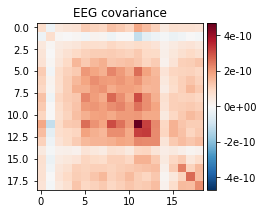

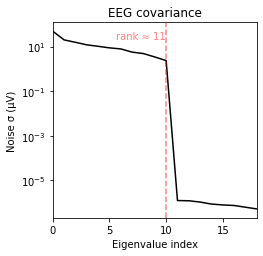

(<Figure size 273.6x266.4 with 2 Axes>, <Figure size 273.6x266.4 with 1 Axes>)

In [14]:
mne.viz.plot_cov(cov, epochs.info)

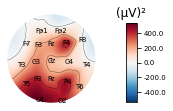

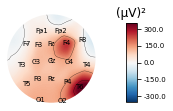

In [15]:
for i in range(2): #range(len(epochs)):
    cov = mne.compute_covariance(epochs[i], verbose=False)
    cov.plot_topomap(epochs.info,show_names=True)

## Calculation 1: spectral_connectivity

In [16]:
%time
# Compute connectivity for band containing the evoked response.
sfreq = raw.info['sfreq'] 

# exclude the baseline period
# tmin = 0.0  
fmin, fmax = 0, np.Inf #4., 9.

con, freqs, times, n_epochs, n_tapers = mne.connectivity.spectral_connectivity(
    epochs, method='pli', mode='fourier', sfreq=sfreq, fmin=fmin, fmax=fmax,
    faverage=True, mt_adaptive=False, n_jobs=1, verbose=False)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


/opt/miniconda3/lib/python3.8/site-packages/mne/connectivity/spectral.py:1010: RuntimeWarning: divide by zero encountered in double_scalars
  5. / np.min(fmin), five_cycle_freq))
<ipython-input-16-6fce39d79dce>:9: RuntimeWarning: fmin=0.000 Hz corresponds to 0.000 < 5 cycles based on the epoch length 1.000 sec, need at least inf sec epochs or fmin=4.998. Spectrum estimate will be unreliable.
  con, freqs, times, n_epochs, n_tapers = mne.connectivity.spectral_connectivity(


## Calculation 2: envelope_correlation

In [17]:
%time
# power envelope correlation between orthogonalized signals 
env_con = mne.connectivity.envelope_correlation(epochs, combine = None)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs


## Calculation 3: compute_covariance

In [18]:
%time
cov = mne.compute_covariance(epochs, verbose=False)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [19]:
# spectral_connectivity
print(con.shape)

# envelope_correlation
print(env_con.shape)

# compute_covariance
print(cov.data.shape)

(19, 19, 1)
(33, 19, 19)
(19, 19)


## 3D Vizualization

In [20]:
# visualize connectivity in 3D:
# figure = mne.viz.plot_sensors_connectivity(epochs.info, con[:,:,0])
# mne.viz.set_3d_view(figure)

In [21]:
# type(figure)

In [22]:
# select_epoch = 2

# visualize connectivity in 3D:
# figure = mne.viz.plot_sensors_connectivity(
#     epochs[select_epoch].info, 
#     env_con[select_epoch], 
#     cbar_label=f"Epoch {select_epoch} Connectivity")
#mne.viz.set_3d_view(figure)

## Manual Line Drawing

In [23]:
raw.get_montage().get_positions()

{'ch_pos': OrderedDict([('Fp1',
               array([-21.90840681,  63.62663337,  -5.28424423])),
              ('Fp2', array([21.90810621, 63.62576037, -5.29598896])),
              ('F7', array([-53.2317449 ,  31.98485919,  -8.63945123])),
              ('T3', array([-66.84435278, -12.99322596,  -7.43361158])),
              ('T5', array([-58.3900796 , -58.3900796 ,  -1.98927356])),
              ('F3', array([-39.98550918,  42.8792089 ,  33.85      ])),
              ('C3', array([-52.68761775,  -9.29024856,  51.84550335])),
              ('P3', array([-43.12261362, -63.93190381,  45.42468348])),
              ('Fz', array([ 0.26592806, 50.78805506, 57.60853015])),
              ('Cz', array([ 0.27739786, -7.94363529, 87.33906176])),
              ('Pz',
               array([ 8.58366287e-15, -7.00909264e+01,  7.13250449e+01])),
              ('F4', array([46.26553757, 48.41411956, 36.35949753])),
              ('C4', array([59.823882  , -9.6893546 , 56.71172322])),
              (

In [24]:
# Plotting options: 
#raw.get_montage().plot();
#raw.plot_sensors()

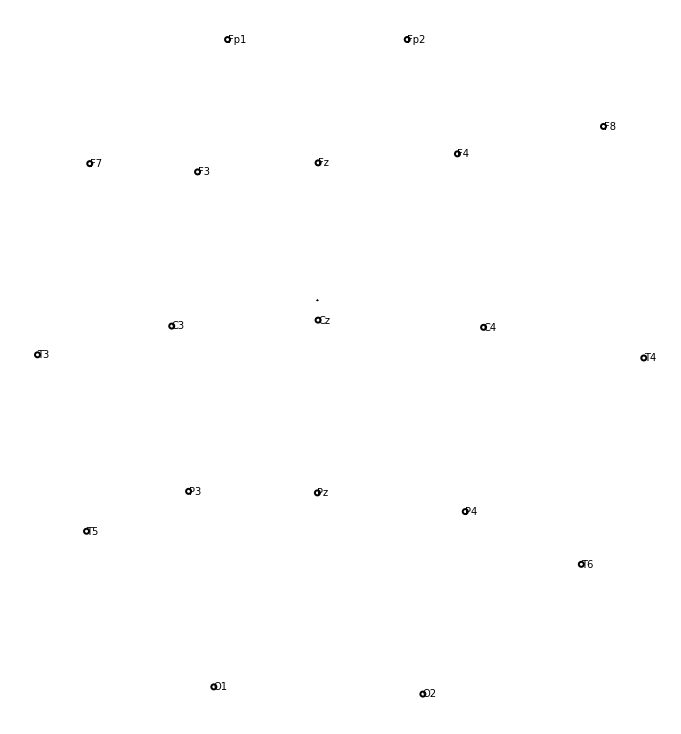

In [25]:
sensor_locations = raw.plot_sensors(show_names=True, ch_groups="selection", kind="topomap", show=False);
locations = sensor_locations.findobj(match = lambda x: type(x) == plt.Text and x.get_text() != "");

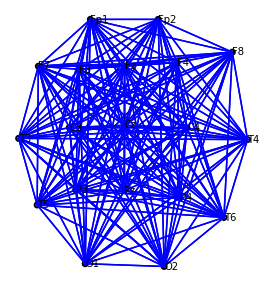

In [26]:
fig = plt.figure()
ax = fig.add_subplot()

node_positions = [node.get_position() for node in locations]
x_list = []
y_list = []
for node1 in node_positions:
    for node2 in node_positions:
        x_list = [node1[0]] + [node2[0]]
        y_list = [node1[1]] + [node2[1]]
        ax.plot(x_list,y_list, color="blue");  

raw.plot_sensors(axes=ax, show_names=True, ch_groups="selection", kind="topomap");
plt.show();

## Misc Experiments

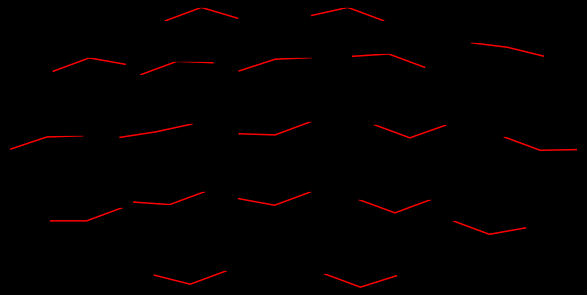

In [27]:
# https://mne.tools/stable/auto_examples/visualization/topo_customized.html#sphx-glr-auto-examples-visualization-topo-customized-py
from mne.viz import iter_topography
for ax, idx in iter_topography(raw.info):
    ax.plot(list(epochs.get_montage().get_positions()["ch_pos"].values())[idx], color='red')
    
plt.show()

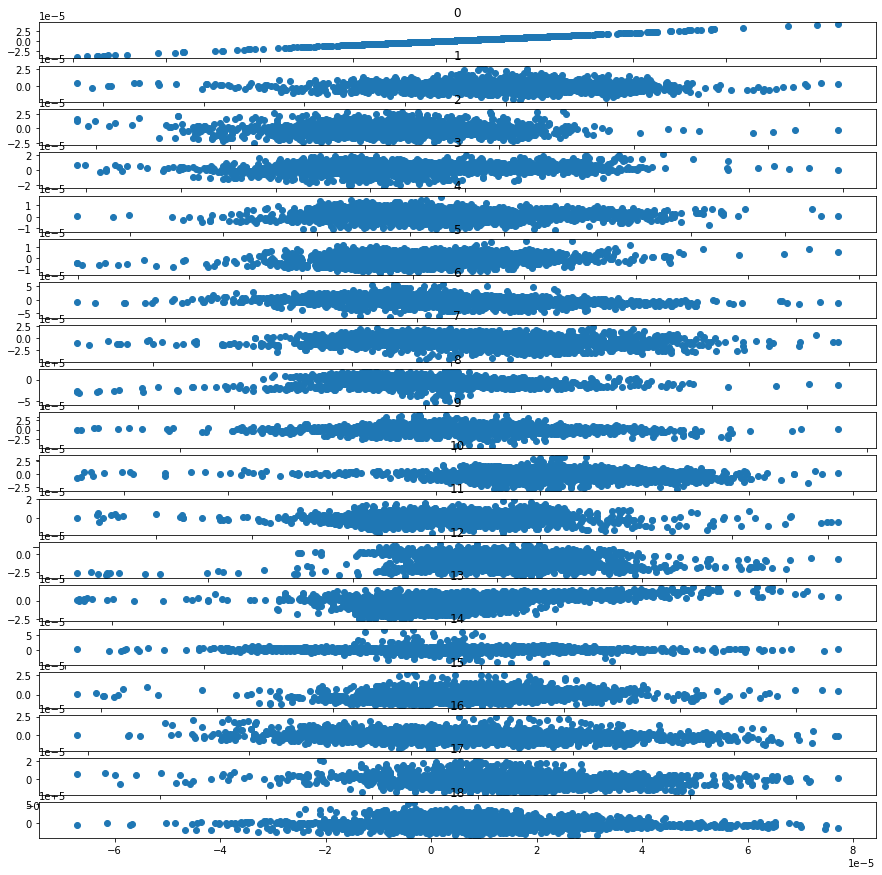

In [28]:
f, axs = plt.subplots(19, figsize=(15, 15))
for i, ax in enumerate(axs.ravel()):
    ax.scatter(epochs.get_data()[:,i][0], epochs.get_data()[i,:][0])
    ax.set_title('{0}'.format(i))

/opt/miniconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


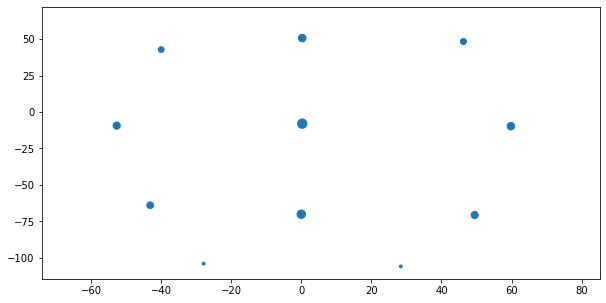

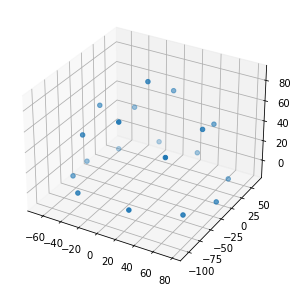

In [29]:
import pandas as pd
df = pd.DataFrame(epochs.get_montage().get_positions()["ch_pos"])
plt.scatter(df.loc[0], df.loc[1], df.loc[2])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df.loc[0], df.loc[1], df.loc[2])
plt.show()

## Connectivity Circle

In [30]:
from mne.minimum_norm import apply_inverse_epochs, read_inverse_operator
from mne.connectivity import spectral_connectivity
from mne.viz import circular_layout, plot_connectivity_circle

In [31]:
labels = channel_names

# show max_connection strongest connections.
max_connections = 50

# for i in range(len(epochs)): 
#     print(plot_connectivity_circle(
#         env_con[i], 
#         channel_names, 
#         n_lines=max_connections,
#         title=f"Epoch {i}"))

In [ ]:
%matplotlib notebook
from IPython.display import HTML
import matplotlib.animation as animation

fig = plt.figure()

def animate(frame_number):
    fig.clear()
    mne.viz.plot_connectivity_circle(
        env_con[frame_number],
        channel_names,
        n_lines=max_connections,
        fig=fig,
        title=f"Epoch {frame_number}"
    )[0]


ani = animation.FuncAnimation(fig, animate, len(epochs), blit=False)
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

## Streamlit version

In [ ]:
#epochs = get_epochs(raw)
env_con = mne.connectivity.envelope_correlation(epochs, combine = None)

fig = plt.figure()

def animate(frame_number):
    fig.clear()
    return [mne.viz.plot_connectivity_circle(
        env_con[frame_number],
        raw.ch_names,
        n_lines=50,
        fig=fig,
        title=f"Epoch {frame_number}"
    )[0]];


ani = animation.FuncAnimation(fig, animate, len(epochs), blit=True)
# components.html(ani.to_jshtml(), height=1000)
HTML(ani.to_jshtml())